In [1]:
# setup
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
display(HTML(open('../rise.css').read()))

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 8)})


/tmp/ipykernel_440833/905109754.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


# CMPS 2200
# Asymptotic Analysis

Agenda:

- Define Asymptotic Notation
- Introduce
    - Asymptotic Proofs
    - The Limit Theorem
    - L'Hôpital's Rule

## Asymptotic Analysis

### Big Idea

- Ignore machine-dependent constants
- Focus on **growth** of running time
  - What happens in the limit as $n \rightarrow \infty$

$ c_1n + c_2n + c_4 \approx c_5n + c_6n + c_4 $


e.g., consider two algorithms with running times:

- algorithm 1: $$c_1 n + c_2$$
- algorithm 2: $$c_3 n^2 + c_4 n + c_5$$

Depending on the machine-dependent constants, algorithm 2 may sometimes be faster than algorithm 1:

- algorithm 1: $$120 n - 2000$$
- algorithm 2: $$n^2$$

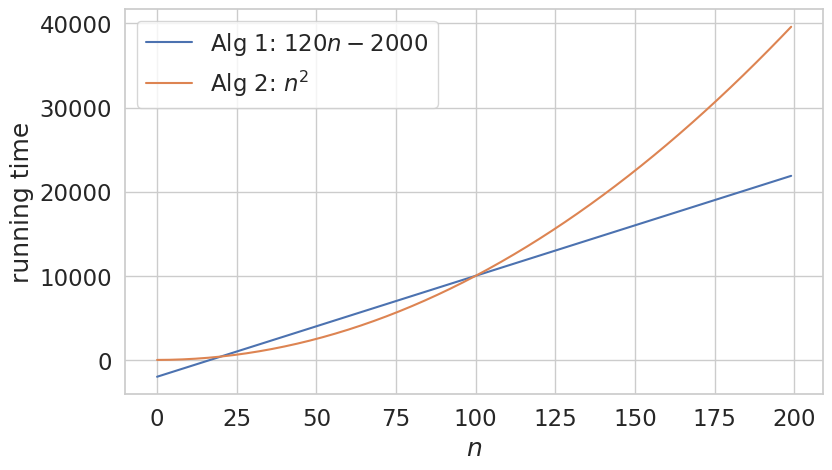

In [2]:
n = np.arange(200)
time1 = 120*n - 2000
time2 = n**2
# plot
plt.figure(figsize=(9,5))
plt.plot(n, time1, label='Alg 1: $120 n - 2000$')
plt.plot(n, time2, label='Alg 2: $n^2$')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

But, as $n \rightarrow \infty$, there will be a point at which algorithm 2 will be slower, **no matter which machine it is run on**


### Definition: Asymptotic dominance

Function $g(n)$ **asymptotically dominates** function $f(n)$ if **there exist** constants $c$ and $n_0$ such that

$ f(n) \le c \cdot g(n)$ **for all** $n \ge n_0$.

<br><br>

e.g., $n^2$ asymptotically dominates $120 n - 2000$.


**Proof:**

Find $c$ and $n_0$ such that

$120 n - 2000 \leq c*n^2$  for all $n>n_0$.

<br>

Let $c=1$. Find an $n_0$ such that 

$
120 n - 2000 \leq n^2 \\
$
for all $n \ge n_0$.

$
\begin{align}
120n - 2000 & \leq n^2 \\
0 & \leq n^2 - 120n + 2000\\
0 & \leq (n-100)(n-20)\\
\end{align}
$


When $n=100$, $120n - 2000 = n^2 $.

For all $n \ge 100$, $120n - 2000 \le n^2 $.

So, $c=1, n_0=100$ satisfies the definition of asymptotic dominance.

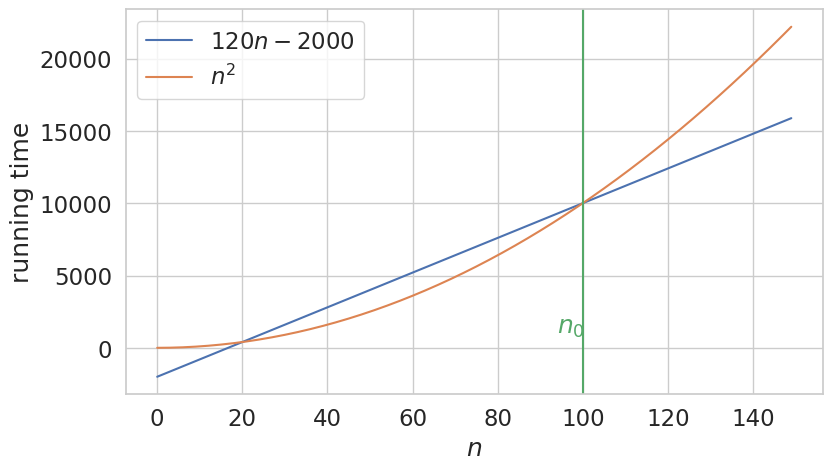

In [3]:
# show n_0
n = np.arange(150)
time1 = 120*n + - 2000
time2 = n*n
# plot
plt.figure(figsize=(9,5))
plt.plot(n, time1, label='$120 n - 2000$')
plt.plot(n, time2, label='$n^2$')
plt.axvline(100, color='g')
plt.text(94,1000,'$n_0$', fontsize=18, color='g')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

## Asymptotic Notation

$
\begin{align}
& T(n) \in \mathcal{O}(g(n)) \iff g(n) \hbox{ asymptotically dominates } T(n)\\
& T(n) \in \Omega(g(n)) \iff T(n) \hbox{ asymptotically dominates } g(n)\\
& \Theta(g(n)) = \{\mathcal{O} (g(n)) \cap \Omega (g(n))\}\\
& \hbox{where } T \hbox{ is used for ``time".}
\end{align}
$


e.g.

$120 n - 2000 \in \mathcal{O}(n^2)$

$10n^3 + 2n^2 - 100 \in \Omega(n^2)$

$14n^2 - 5n +50 \in \Theta(n^2)$

You might see notation such as

$120 n - 2000 = \mathcal{O}(n^2)$.

This is questionable notation, since $O(n^2)$ is a family of functions. However, it is an accepted convention and appears in classic texts like The Art of Computer Programming.

<br>

The following is also acceptable.

$120 n - 2000 \mathrm{~is~} \mathcal{O}(n^2)$

## Definitions

**Big-Oh**

$T(n) \in \mathcal{O}(g(n))$ if **there exist** positive constants $c$ and $n_0$ such that

$ T(n) \le c \cdot g(n)$ **for all** $n \ge n_0$.

**Omega**

$T(n) \in \Omega(g(n))$ if **there exist** positive constants $c$ and $n_0$ such that

$ T(n) \ge c \cdot g(n)$ **for all** $n \ge n_0$.

**Theta**

$T(n) \in \Theta(g(n))$ if **there exist** positive constants $c_1$, $c_2$, and $n_0$ such that

$c_1 \cdot g(n) \le T(n) \le c_2 \cdot g(n)$ **for all** $n \ge n_0$.

In other words:

$ T(n) \in \mathcal{O}(g(n)) \hbox{ and } T(n) \in \Omega(g(n))$.



**Little-oh**

$T(n) \in o(g(n))$ if **for every** positive constant $c$, there exists an $n_0$ such that

$ T(n) \lt c \cdot g(n)$ **for all** $n \ge n_0$.

**Little-omega**

$T(n) \in \omega(g(n))$ if **for every** positive constant $c$, there exists an $n_0$ such that

$ T(n) \gt c \cdot g(n)$ **for all** $n \ge n_0$.


<br>

**Intuition:**

|$\mathcal{O}~~~$ | $\Omega~~~$ | $\Theta~~~$ | $\mathcal{o}~~~$ | $\omega~~~$ |
|--------------|----------|----------|---------------|----------|
| $\leq~~~$       | $\geq~~~$   | $=~~~$      | $\lt~~~$         | $\gt~~~$    |    


The analogy is justified by some of the following properties

For arbitrary real functions $f$ and $g$, the following hold:
1. $f\in O(g) \iff g\in \Omega(f)$. (Analog of $a\leq b \iff b\geq a$)
2. If $f\in O(g)$ and $g\in O(h)$, then $f\in O(h)$. (Transitivity of $O$)
3. $f\in \Theta(f)$ (reflexivity of $\Theta$)
4. If $f\in \Theta(g) \iff g \in \Theta(f)$ (Symmetry of $\Theta$)
5. If $f\in \Theta(g)$ and $g\in \Theta(h)$, then $f\in \Theta(h)$ (Transitivity of $\Theta$)

<h4>Intuition pitfalls</h4>

The intuition above is good, but it can lead to misconceptions. These misconceptions are rarely important in practice.

1. Big-O is not a partial order. There are [two functions](https://ansuz.sooke.bc.ca/entry/185) $f$ and $g$ such that neither $f\in O(g)$ nor $g\in O(f)$. On the other hand, either $a\leq b$ or $b\leq a$.
2. $f \in O(g)$ is *not* the negation of $f\in \omega(g)$. On the other hand, $a\leq b$ is the negation of $a>b$.
3. We cannot conclude $f\in o(g)$ from $f\in O(g)$ and $f\not \in \Theta(g)$. On the other hand, we can conclude $a<b$ from $a\leq b$ and $a\neq b$.

# Calculating Asymtotic Classes.

Given a function $f:\mathbb{N}\to\mathbb{R}$, how can we calculate which $\Theta$ class it belongs to?

Based on the definitions, we can conclude the following two rules:

We also have these rules that are helpful for quickly reasoning about the asymtotic behavior. Assume $f,g\in \omega(1)$, meaning that they are both eventually arbitrarily far from $0$. 

1. If $a \in \Theta(f)$ and $b\in \Theta(g)$, then $a+b\in \Theta(f+g)=\Theta(\max(\{f,g\}))$. "Asymptotic behaviors add." By 'max' we mean whichever is bigger in terms of Big-oh.
2. If $a \in \Theta(f)$ and $b\in \Theta(g)$, then $ab\in \Theta(fg)$. "Asymptotic behaviors multiply"
3. If $a \in \Theta(f)$, $b\in \Theta(g)$, then $\frac{a}{b}\in \Theta(\frac{f}{g})$.

These rules can have exceptions, like $n^2 + (-1)n^2=0 \not \in \Theta(n^2)$. But these exceptions usually don't happen in practice because our functions represent runtimes, which are positive and remove the possibility for cancellation.


Now we give some quick rules to calculate the big-O of various families. We can build most functions by adding and multiplying elements of these families, so we can quickly calculate the $\Theta$ class of most functions.

1. If $k_1,k_2\in\mathbb{Z}$ satisfy $k_1 <k_2$, then $n^{k_1}\in O(n^{k_2})$.
2. Bases of logs don't affect complexity classes: $\log_b(n) = \frac{\log_2(n)}{\log_2(b)}\in O(\log_2(n))$. We assume that all logs are base $2$.
3. Polynomials inside logs don't affect complexity classes: $\log(n^k)=k\log(n)\in \Theta(\log(n))$.
4. For all $k \in \mathbb{Z}$, we have that $[\log(n)]^k \in o([\log(n)]^{k+1})$ and $[\log(n)]^{k+1} \in o(n)$.
5. For all $k \in \mathbb{Z}$, we have $[\log(\log(n))]^k \in o(\log(n))$.
6. Bounded functions (like sine) are $O(1)$.
7. If $1<c_1<c_2$, then $c_1^n\in o(c_2^n)$.

Example: What is the complexity class of $f=\frac{\log(\log(n))(5n^5-15)}{(n^3+12) \log(n^2)}$?

The quotient rule allows us to consider the numerator and denominator separately. The numerator is $\Theta(\log(\log(n))n^5)$ by the product and sum rules. The denominator is $\Theta(n^3\log(n))$. Dividing the two gives the theta class $\Theta(\frac{\log(\log(n))n^3}{ \log(n)})$.

Since there may be exceptions to these rules, as noted above, we need a method that is easier to calculate with than the formal definitions, but can easily be seen to be correct in all cases where it applies.


# The Limit Theorem

We did not justify the rules to calculate complexity classes. It should be possible to prove these rules from the definitions, but a nice theorem makes the calculations in the proofs much easier, at the expense of additional assumptions which usually don't matter. This is the Limit Theorem, which characterizes the asymptotic relationship between two functions based on the limit of their ratio.

Since asymptotic analysis is concerned with the rates of growth of function as our input increases to infinity, we can use limits to infinity to determine and to prove the asymptotic relationships between functions.



If $\lim_{n \to \infty} \frac{T(n)}{g(n)}$ exists, then we can use its value to prove asymptotic relationships, because its value measures the relative sizes of $T(n)$ and $g(n)$ for large values of $n$.

1. If this limit goes to 0, then $g(n)$ must be growing at a faster rate than $T(n)$. In this case, $g(n)$ is asymptotically dominating $T(n)$.
2. If this limit goes to $\infty$, then $T(n)$ must be growing at a faster rate than $g(n)$. In this case, $T(n)$ is asymptotically dominating $g(n)$
3. If this limit goes to a constant, then both functions are growing at the same rate.

Let's focus on this last case in more detail:

$$
\lim_{n \to \infty} \frac{T(n)}{g(n)} = c \text{ if } T(n) \in \Theta(g(n)).
$$

Why does the limit going to a constant indicate that $T(n) \in \Theta(g(n))$?

Recall that $T(n)$ is $\Theta(g(n))$ if there exists constants $c_1$, $c_2$, and $n_o$ such that:

$c_1*g(n) \le T(n) \le c_2*g(n)$ **for all** $n \ge n_0$.

Dividing by $g(n)$ yields:

$c_1 \le \frac{T(n)}{g(n)} \le c_2$ **for** $n \ge n_0$.

Since $\frac{T(n)}{g(n)}$ is bounded by two constants, it must be a constant. 

Thus, in the case where $T(n) \in \Theta(g(n))$, the limit goes to a constant.
**The Limit Theorem**

If $\lim_{n \to \infty} \frac{T(n)}{g(n)}$ exists, then

$$
\lim_{n \to \infty} \frac{T(n)}{g(n)} =
\begin{cases}
  0  & \text{ if } T(n) \in o(g(n)) \text{ ...also } \mathcal{O}(g(n))\\
  c  & \text{ if } T(n) \in \Theta(g(n)) \text{ ...also } \mathcal{O}(g(n)) \text{, } \Omega(g(n))\\
  \infty  & \text{ if } T(n) \in \omega(g(n)) \text{ ...also } \Omega(g(n))\\
\end{cases}.
$$



## Using the Limit Theorem



Ex: Prove that $an^2 + bn + c \in \Theta(n^2)$, for all positive constants $a,b,c$.

$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n^2} $$
$$ = \lim_{n \to \infty} a + \lim_{n \to \infty} \frac{b}{n} + \lim_{n \to \infty} \frac{c}{n^2} $$
$$ = a. $$

Since the limit goes to a constant, $an^2 + bn + c \in \Theta(n^2)$.

Ex: Prove that $an^2 + bn + c \in \mathcal{O}(n^3)$.

$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n^3} $$
$$ = \lim_{n \to \infty} \frac{a}{n} + \lim_{n \to \infty} \frac{b}{n^2} + \lim_{n \to \infty} \frac{c}{n^3} $$
$$ = 0. $$

Since the limit goes to a $0$, $an^2 + bn + c \in \mathcal{O}(n^3)$.

Ex: Prove that $an^2 + bn + c \in \Omega(n)$.

$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n} $$
$$ = \lim_{n \to \infty} an + \lim_{n \to \infty} \frac{b}{1} + \lim_{n \to \infty} \frac{c}{n} $$
$$ = \infty. $$

Since the limit goes to a $\infty$, $an^2 + bn + c \in \Omega(n)$.


The limit theorem does not always apply. It is possible that the limit does not exist, yet $T(n)\in \Theta(g)$. For example, if $T(n)=\begin{cases}1 &\text{ if } n\%2==0 \\ 0 &\text{otherwise}\end{cases}$ and $g(n)=1$, then $T(n)\in \Theta(g(n))$, but $\lim_{n\to \infty} \frac{T(n)}{g(n)}$ does not exist. You might object that this is an unusual case because $T$ is not continous, or because $T$ is not monotonic. But the functions that we are interested in are generally not continuous, since $n$ represents the size of an input and must be a natural number. And it's not hard to imagine that some algorithms may handle the case of an odd-sized input differently than an even-sized input. This is why we don't take the limit characterization as our definition of $\Theta$.

## Simplifying Limits, L'Hôpital's Rule



Not all limits are so easy to evaluate. When calculating limits of the form $\lim_{n\to \infty} \frac{T(n)}{g(n)}$, we can use a special tool known as L'Hôpital's Rule. The rule is intuitive: If $T(n)$ and $g(n)$ both go to infinity, you should compare the rates at which they go to infinity.

L'Hôpital's Rule [states](https://www.math.ucdavis.edu/~kouba/CalcOneDIRECTORY/lhopitaldirectory/LHopital.html), in part that:

Let $f,g$ be differentiable functions that both go to infinity: $\lim_{n\to \infty}f(n)= \lim_{n\to\infty} g(n) = \infty$. If $\lim_{n \to \infty} \frac{f(n)}{g(n)}$ exists (meaning that it is a real number or $\pm \infty$), then

$$\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{f'(n)}{g'(n)}.$$

Since the derivatives of functions are often simpler than the original functions, this rule can help us apply the Limit Theorem. Sometimes, you can apply the rule iteratively.

Ex. Is $\ln n \in \Omega(n)$?

$\lim_{n \to \infty} \frac{\ln n}{n} = \lim_{n \to \infty} \frac{1/n}{1} = \lim_{n \to \infty} \frac{1}{n} = 0$. The first inequality uses L'Hôpital's Rule.

By the limit theorem, $\ln n \in \mathcal{O}(n)$.

Therefore, $\ln (n) \notin \Omega(n)$.